# Deepset Studio

## Home

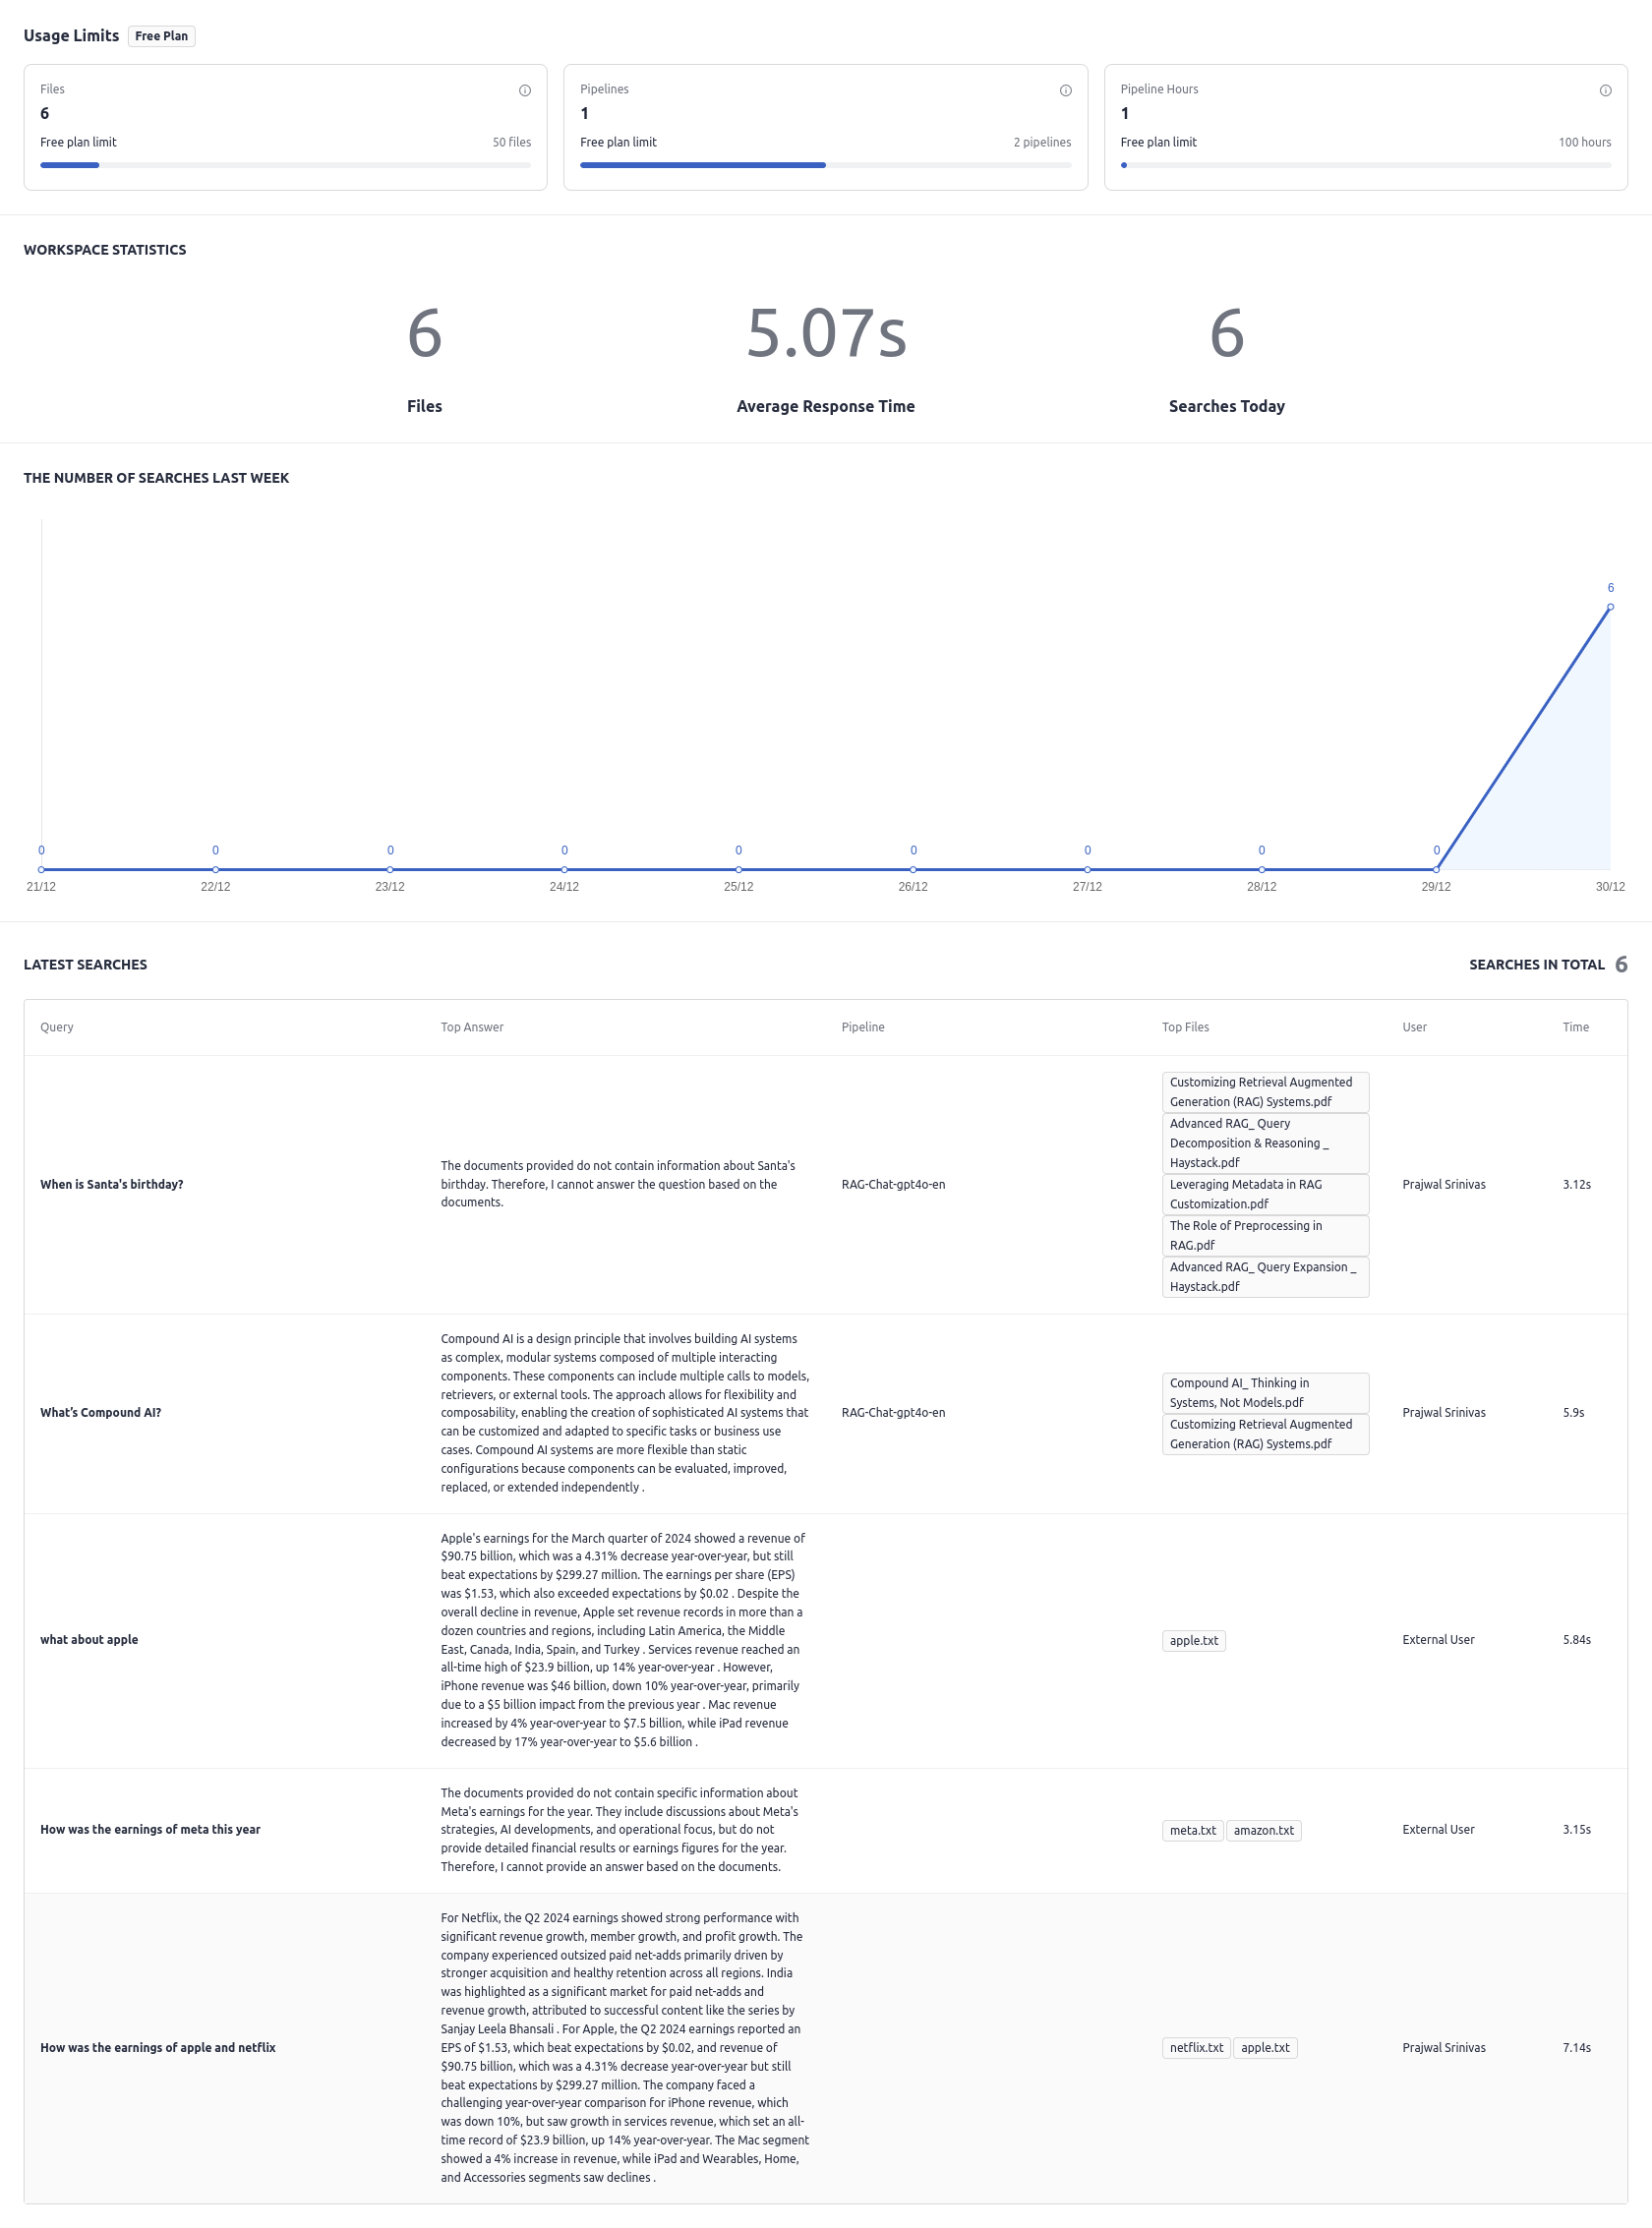

## Files

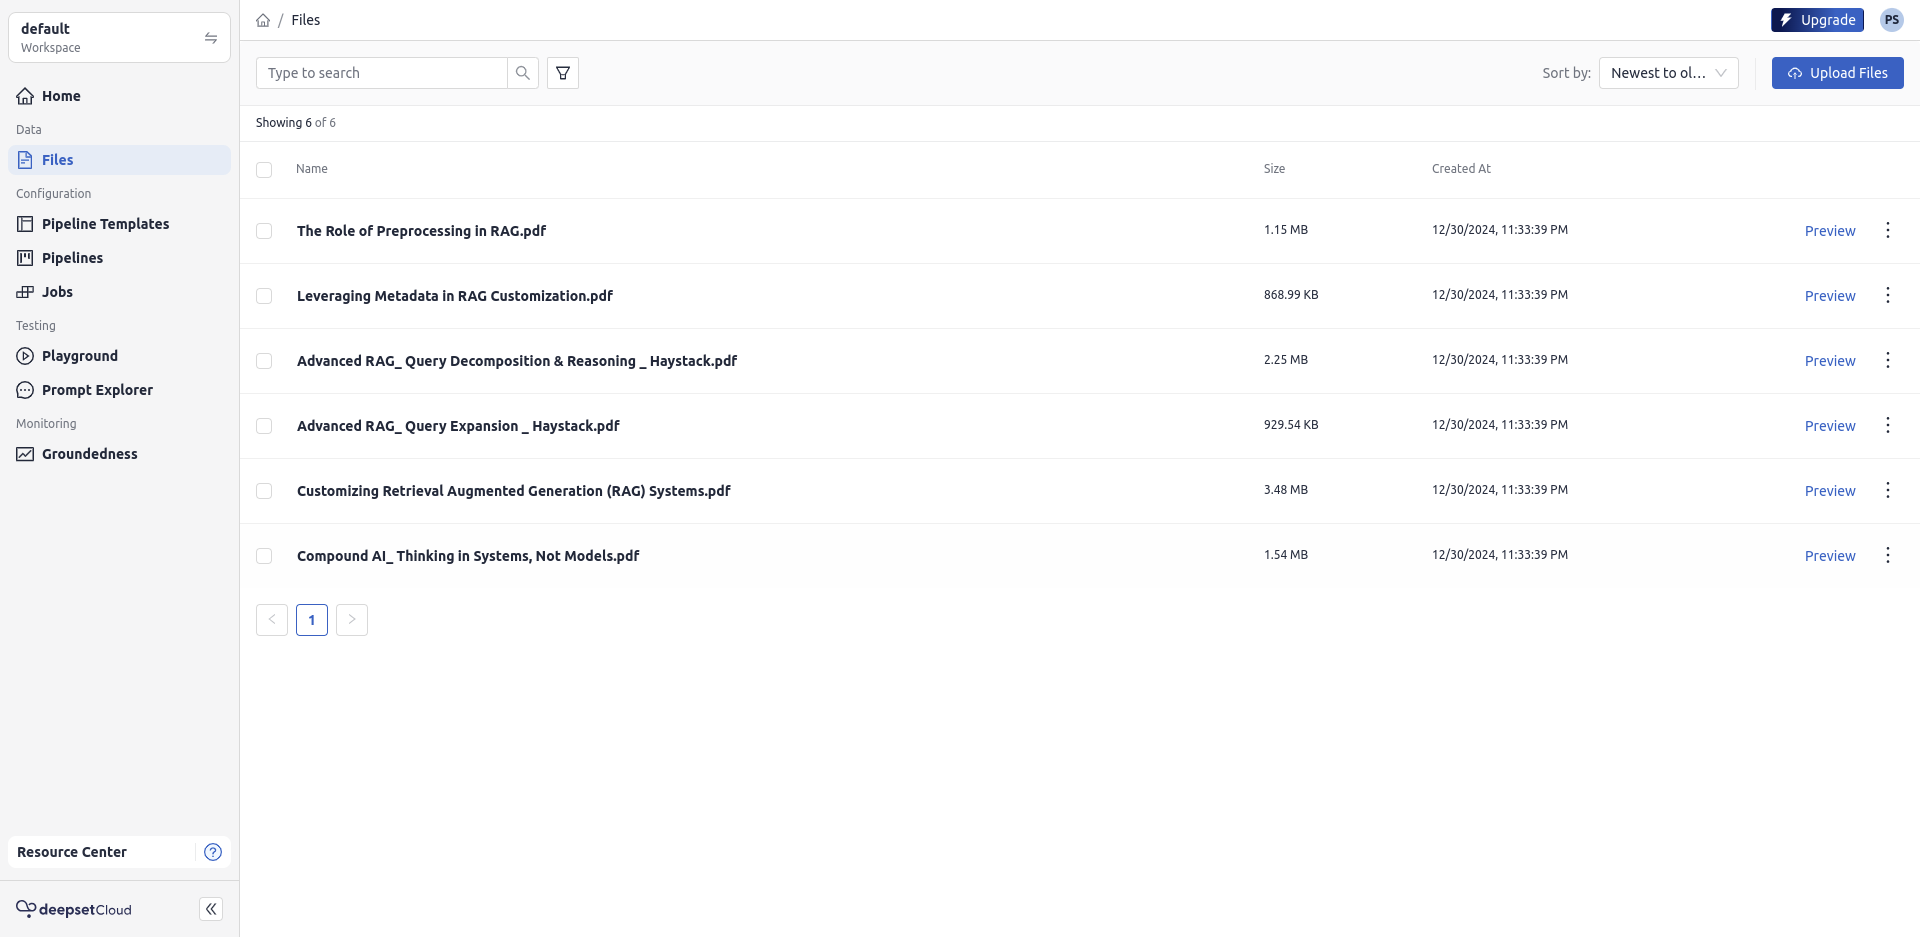

## Pipeline Templates

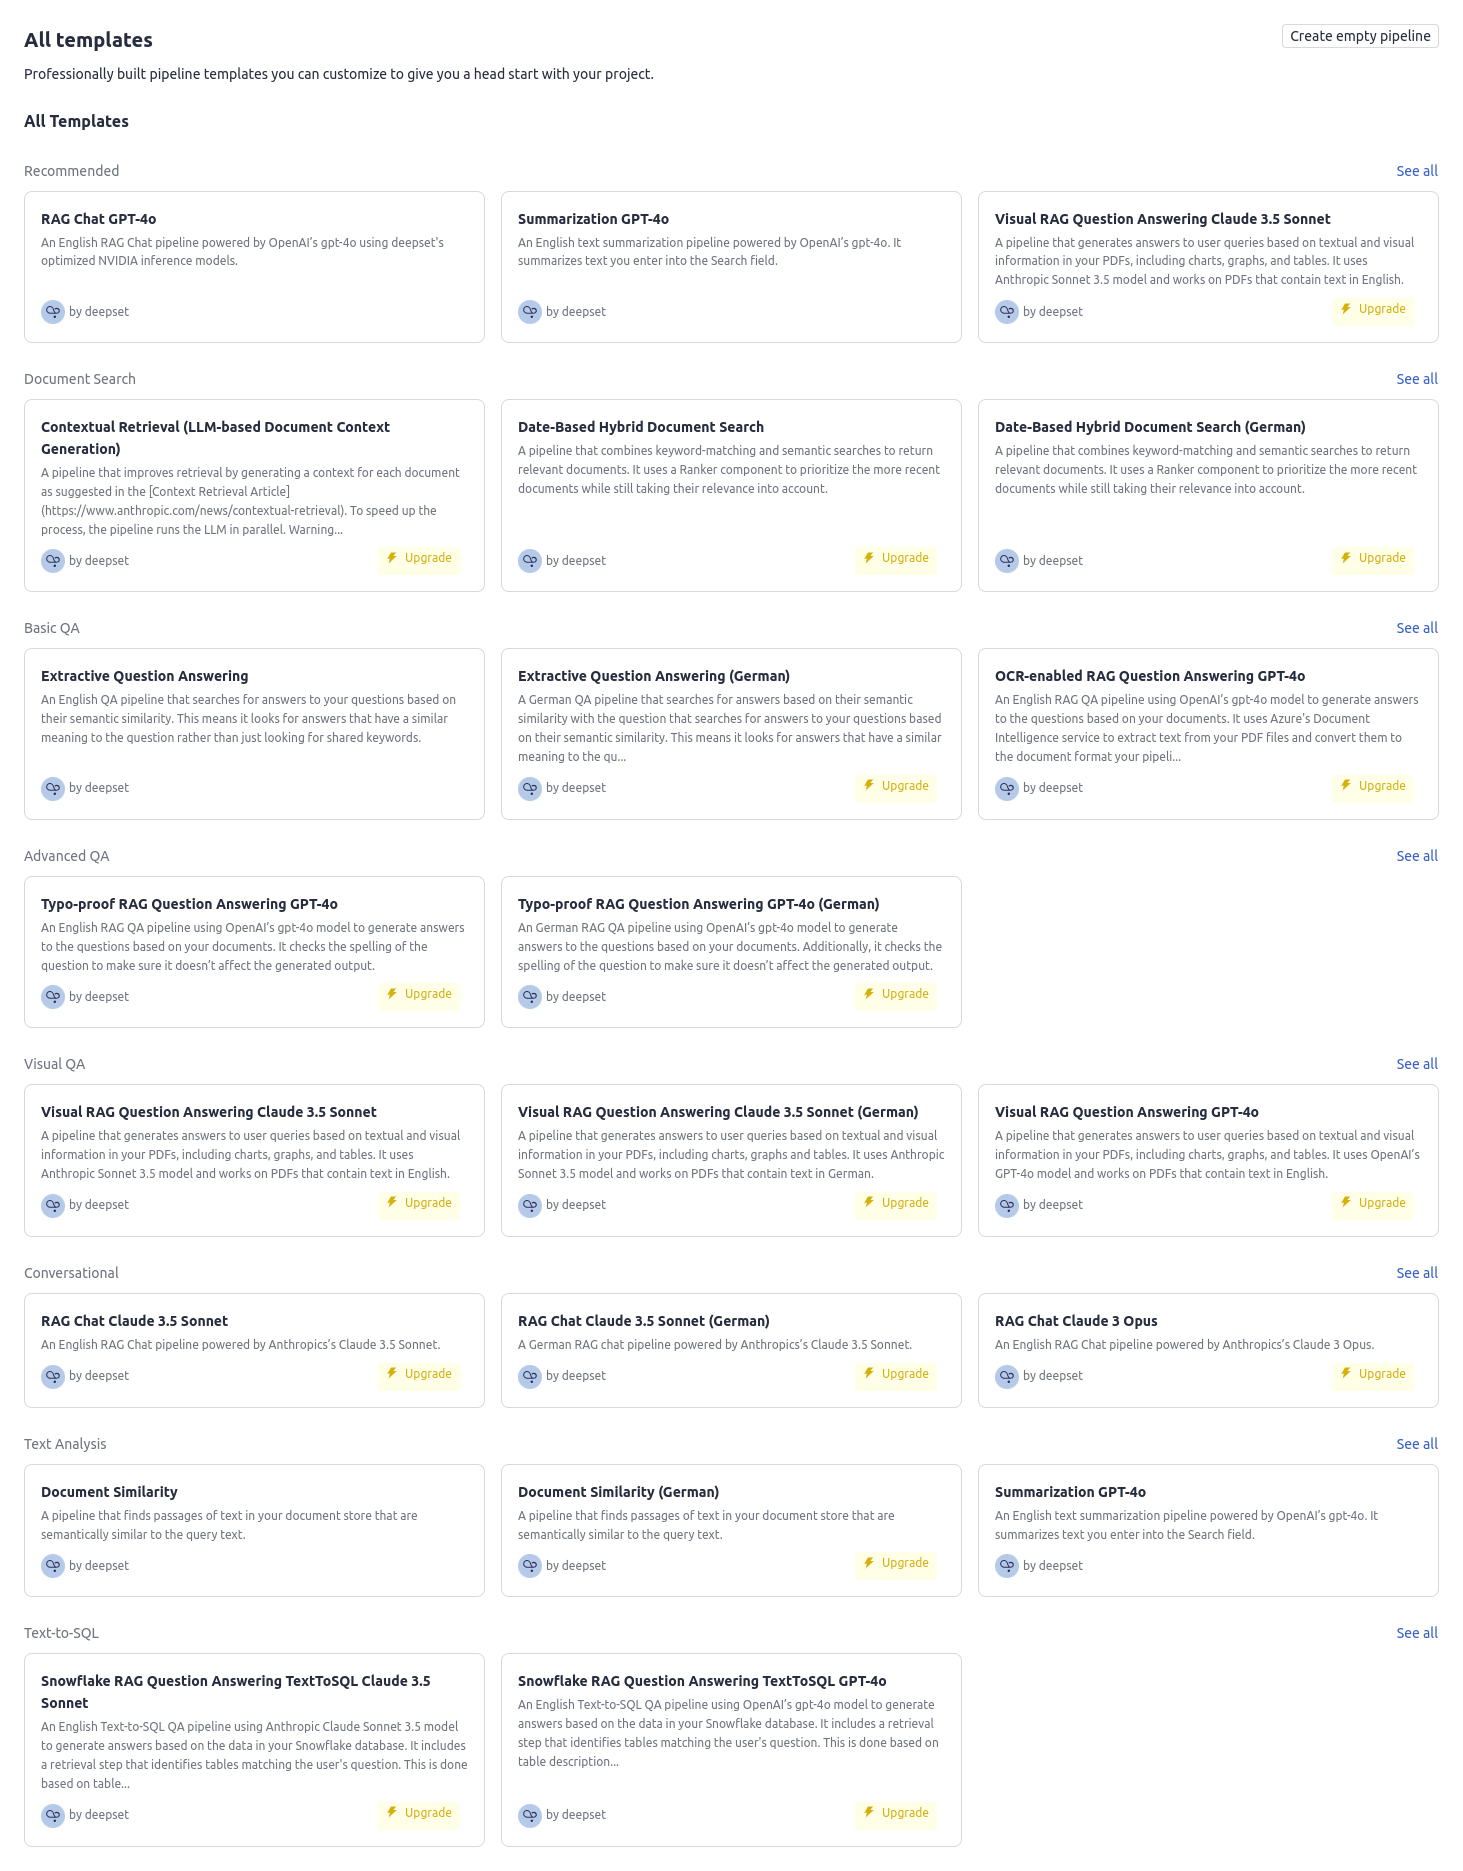

## Indexing Pipeline

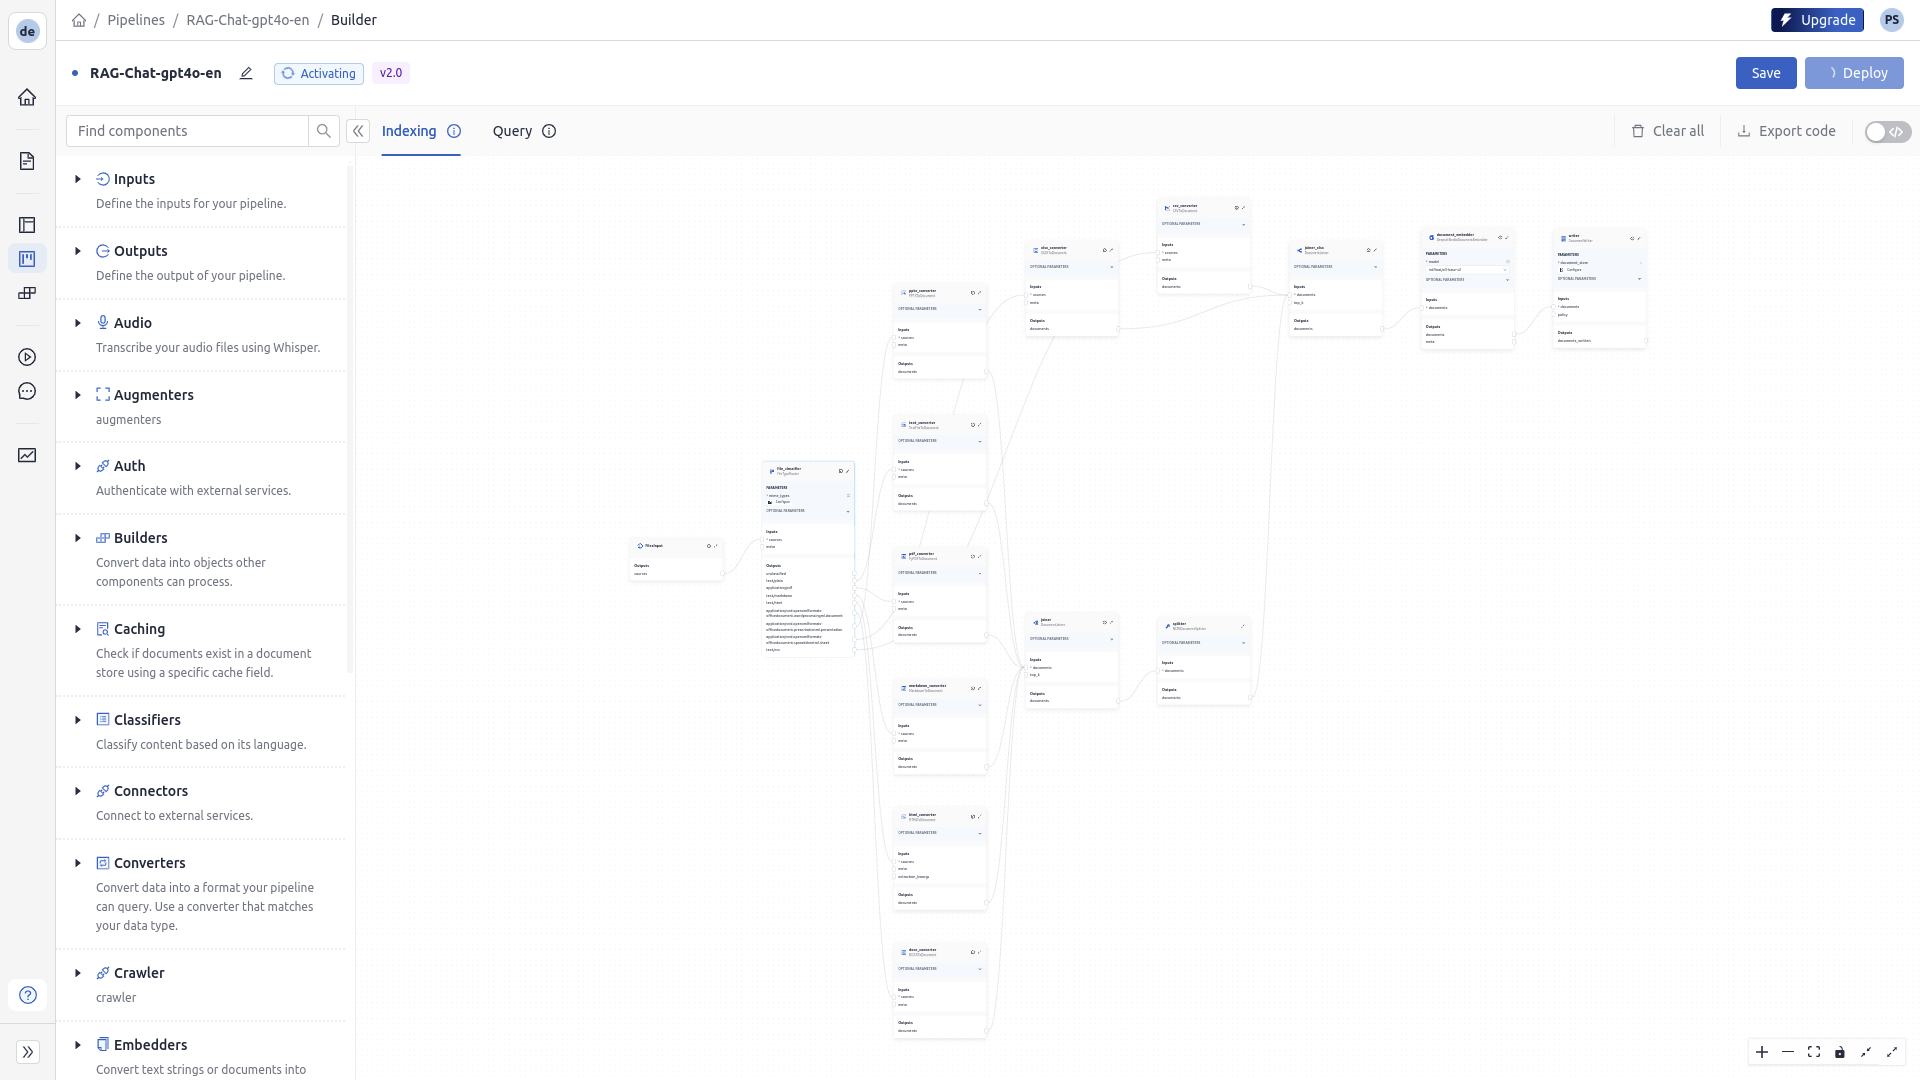

```python

"""
# The pipeline contains a component that is only available in deepset Cloud. These components
# are optimized to run in a could environment, but you can replace them with the local OSS 
# version. Check the docs of the component. We provide local examples there. 
"""
from haystack import Pipeline
from haystack.components.routers.file_type_router import FileTypeRouter
from haystack.components.converters.txt import TextFileToDocument
from haystack.components.converters.pypdf import PyPDFToDocument
from haystack.components.converters.markdown import MarkdownToDocument
from haystack.components.converters.html import HTMLToDocument
from haystack.components.converters.docx import DOCXToDocument
from haystack.components.converters.pptx import PPTXToDocument
from deepset_cloud_custom_nodes.converters.xlsx import XLSXToDocument
from haystack.components.converters.csv import CSVToDocument
from haystack.components.joiners.document_joiner import DocumentJoiner
from haystack.components.preprocessors.nltk_document_splitter import NLTKDocumentSplitter
from deepset_cloud_custom_nodes.embedders.nvidia.document_embedder import DeepsetNvidiaDocumentEmbedder
from haystack_integrations.document_stores.opensearch.document_store import OpenSearchDocumentStore
from haystack.components.writers.document_writer import DocumentWriter

file_classifier = FileTypeRouter(mime_types=text/plain,application/pdf,text/markdown,text/html,application/vnd.openxmlformats-officedocument.wordprocessingml.document,application/vnd.openxmlformats-officedocument.presentationml.presentation,application/vnd.openxmlformats-officedocument.spreadsheetml.sheet,text/csv)
text_converter = TextFileToDocument(encoding="utf-8")
pdf_converter = PyPDFToDocument()
markdown_converter = MarkdownToDocument(table_to_single_line=False)
html_converter = HTMLToDocument(extraction_kwargs={"output_format": "txt", "target_language": None, "include_tables": True, "include_links": False})
docx_converter = DOCXToDocument()
pptx_converter = PPTXToDocument()
xlsx_converter = XLSXToDocument()
csv_converter = CSVToDocument(encoding="utf-8")
joiner = DocumentJoiner(join_mode="concatenate", sort_by_score=False)
joiner_xlsx = DocumentJoiner(join_mode="concatenate", sort_by_score=False)
splitter = NLTKDocumentSplitter(split_by="word", split_length=250, split_overlap=30, respect_sentence_boundary=True, language="en")
document_embedder = DeepsetNvidiaDocumentEmbedder(model="intfloat/e5-base-v2", normalize_embeddings=True)
document_store = OpenSearchDocumentStore(embedding_dim=768)
writer = DocumentWriter(policy="OVERWRITE", document_store=document_store)

pipeline = Pipeline()
pipeline.add_component("file_classifier", file_classifier)
pipeline.add_component("text_converter", text_converter)
pipeline.add_component("pdf_converter", pdf_converter)
pipeline.add_component("markdown_converter", markdown_converter)
pipeline.add_component("html_converter", html_converter)
pipeline.add_component("docx_converter", docx_converter)
pipeline.add_component("pptx_converter", pptx_converter)
pipeline.add_component("xlsx_converter", xlsx_converter)
pipeline.add_component("csv_converter", csv_converter)
pipeline.add_component("joiner", joiner)
pipeline.add_component("joiner_xlsx", joiner_xlsx)
pipeline.add_component("splitter", splitter)
pipeline.add_component("document_embedder", document_embedder)
pipeline.add_component("writer", writer)
pipeline.connect("file_classifier.text/plain", "text_converter.sources")
pipeline.connect("file_classifier.application/pdf", "pdf_converter.sources")
pipeline.connect("file_classifier.text/markdown", "markdown_converter.sources")
pipeline.connect("file_classifier.text/html", "html_converter.sources")
pipeline.connect("file_classifier.text/csv", "csv_converter.sources")
pipeline.connect("text_converter.documents", "joiner.documents")
pipeline.connect("pdf_converter.documents", "joiner.documents")
pipeline.connect("markdown_converter.documents", "joiner.documents")
pipeline.connect("html_converter.documents", "joiner.documents")
pipeline.connect("docx_converter.documents", "joiner.documents")
pipeline.connect("pptx_converter.documents", "joiner.documents")
pipeline.connect("joiner.documents", "splitter.documents")
pipeline.connect("splitter.documents", "joiner_xlsx.documents")
pipeline.connect("xlsx_converter.documents", "joiner_xlsx.documents")
pipeline.connect("csv_converter.documents", "joiner_xlsx.documents")
pipeline.connect("joiner_xlsx.documents", "document_embedder.documents")
pipeline.connect("document_embedder.documents", "writer.documents")

# Documentation:
# To run the pipeline, use the pipeline.run() method with the appropriate data.
# Here is an example on how to execute the pipeline:
# The pipeline is defined and loaded above. To execute it, use:
result = pipeline.run(data={"file_classifier":{"sources":"..."}})

```

```yaml
# If you need help with the YAML format, have a look at https://docs.cloud.deepset.ai/v2.0/docs/create-a-pipeline#create-a-pipeline-using-pipeline-editor.
# This section defines components that you want to use in your pipelines. Each component must have a name and a type. You can also set the component's parameters here.
# The name is up to you, you can give your component a friendly name. You then use components' names when specifying the connections in the pipeline.
# Type is the class path of the component. You can check the type on the component's documentation page.
components:
  file_classifier:
    type: haystack.components.routers.file_type_router.FileTypeRouter
    init_parameters:
      mime_types:
      - text/plain
      - application/pdf
      - text/markdown
      - text/html
      - application/vnd.openxmlformats-officedocument.wordprocessingml.document
      - application/vnd.openxmlformats-officedocument.presentationml.presentation
      - application/vnd.openxmlformats-officedocument.spreadsheetml.sheet
      - text/csv

  text_converter:
    type: haystack.components.converters.txt.TextFileToDocument
    init_parameters:
      encoding: utf-8

  pdf_converter:
    type: haystack.components.converters.pypdf.PyPDFToDocument
    init_parameters:
      converter:

  markdown_converter:
    type: haystack.components.converters.markdown.MarkdownToDocument
    init_parameters:
      table_to_single_line: false

  html_converter:
    type: haystack.components.converters.html.HTMLToDocument
    init_parameters:
      # A dictionary of keyword arguments to customize how you want to extract content from your HTML files.
      # For the full list of available arguments, see
      # the [Trafilatura documentation](https://trafilatura.readthedocs.io/en/latest/corefunctions.html#extract).
      extraction_kwargs:
        output_format: txt  # Extract text from HTML. You can also also choose "markdown"
        target_language:       # You can define a language (using the ISO 639-1 format) to discard documents that don't match that language.
        include_tables: true  # If true, includes tables in the output
        include_links: false  # If true, keeps links along with their targets

  docx_converter:
    type: haystack.components.converters.docx.DOCXToDocument
    init_parameters: {}

  pptx_converter:
    type: haystack.components.converters.pptx.PPTXToDocument
    init_parameters: {}

  xlsx_converter:
    type: deepset_cloud_custom_nodes.converters.xlsx.XLSXToDocument
    init_parameters: {}

  csv_converter:
    type: haystack.components.converters.csv.CSVToDocument
    init_parameters:
      encoding: utf-8

  joiner:
    type: haystack.components.joiners.document_joiner.DocumentJoiner
    init_parameters:
      join_mode: concatenate
      sort_by_score: false

  joiner_xlsx:  # merge split documents with non-split xlsx documents
    type: haystack.components.joiners.document_joiner.DocumentJoiner
    init_parameters:
      join_mode: concatenate
      sort_by_score: false

  splitter:
    type: haystack.components.preprocessors.nltk_document_splitter.NLTKDocumentSplitter
    init_parameters:
      split_by: word
      split_length: 250
      split_overlap: 30
      respect_sentence_boundary: true
      language: en

  document_embedder:
    type: deepset_cloud_custom_nodes.embedders.nvidia.document_embedder.DeepsetNvidiaDocumentEmbedder
    init_parameters:
      model: intfloat/e5-base-v2
      normalize_embeddings: true

  writer:
    type: haystack.components.writers.document_writer.DocumentWriter
    init_parameters:
      document_store:
        type: haystack_integrations.document_stores.opensearch.document_store.OpenSearchDocumentStore
        init_parameters:
          embedding_dim: 768
      policy: OVERWRITE

connections:  # Defines how the components are connected
- sender: file_classifier.text/plain
  receiver: text_converter.sources
- sender: file_classifier.application/pdf
  receiver: pdf_converter.sources
- sender: file_classifier.text/markdown
  receiver: markdown_converter.sources
- sender: file_classifier.text/html
  receiver: html_converter.sources
- sender: file_classifier.text/csv
  receiver: csv_converter.sources
- sender: text_converter.documents
  receiver: joiner.documents
- sender: pdf_converter.documents
  receiver: joiner.documents
- sender: markdown_converter.documents
  receiver: joiner.documents
- sender: html_converter.documents
  receiver: joiner.documents
- sender: docx_converter.documents
  receiver: joiner.documents
- sender: pptx_converter.documents
  receiver: joiner.documents
- sender: joiner.documents
  receiver: splitter.documents
- sender: splitter.documents
  receiver: joiner_xlsx.documents
- sender: xlsx_converter.documents
  receiver: joiner_xlsx.documents
- sender: csv_converter.documents
  receiver: joiner_xlsx.documents
- sender: joiner_xlsx.documents
  receiver: document_embedder.documents
- sender: document_embedder.documents
  receiver: writer.documents

inputs:  # Define the inputs for your pipeline
  files: "file_classifier.sources"  # This component will receive the files to index as input

max_runs_per_component: 100

metadata: {}

```

## Query Pipeline

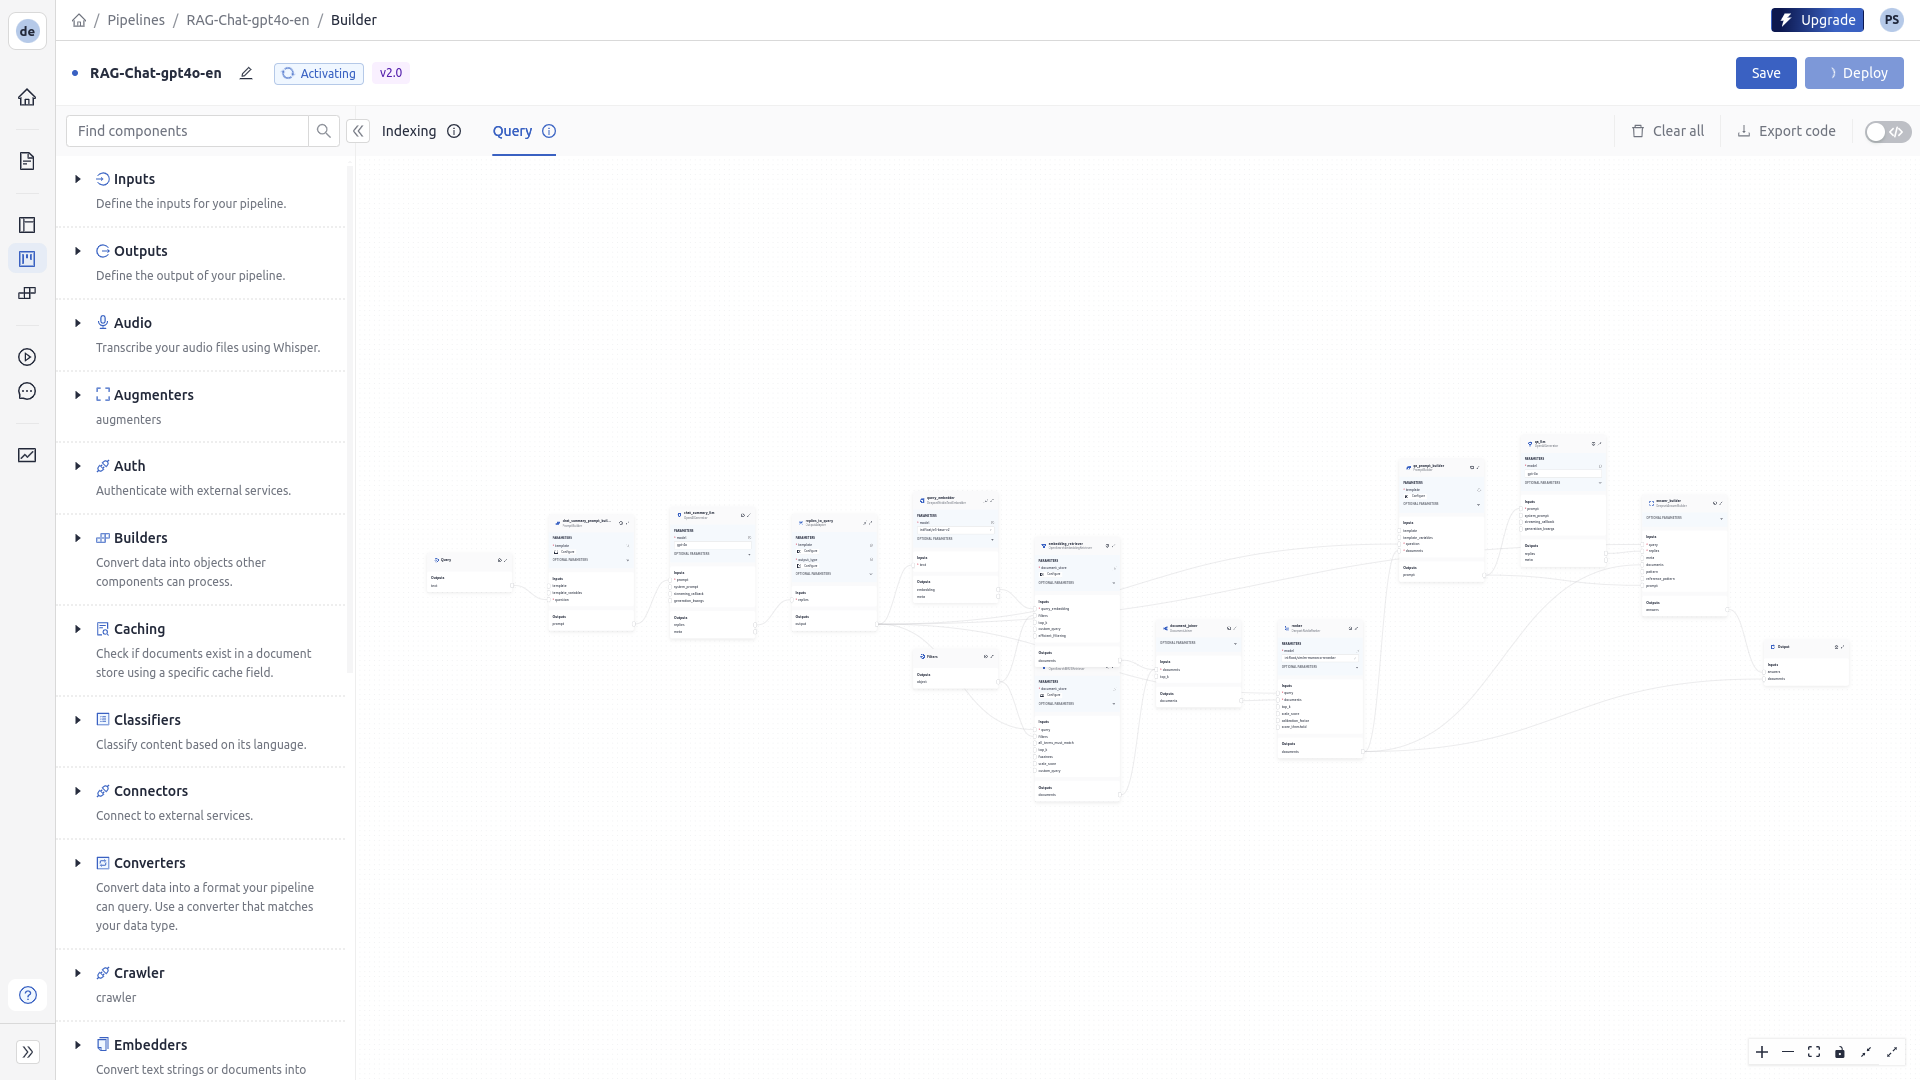

```python

"""
# The pipeline contains a component that is only available in deepset Cloud. These components
# are optimized to run in a could environment, but you can replace them with the local OSS 
# version. Check the docs of the component. We provide local examples there. 
"""
from haystack import Pipeline
from haystack.components.builders.prompt_builder import PromptBuilder
from haystack.utils import Secret
from haystack.components.generators.openai import OpenAIGenerator
from haystack.components.converters.output_adapter import OutputAdapter
from haystack_integrations.document_stores.opensearch.document_store import OpenSearchDocumentStore
from haystack_integrations.components.retrievers.opensearch.bm25_retriever import OpenSearchBM25Retriever
from deepset_cloud_custom_nodes.embedders.nvidia.text_embedder import DeepsetNvidiaTextEmbedder
from haystack_integrations.components.retrievers.opensearch.embedding_retriever import OpenSearchEmbeddingRetriever
from haystack.components.joiners.document_joiner import DocumentJoiner
from deepset_cloud_custom_nodes.rankers.nvidia.ranker import DeepsetNvidiaRanker
from deepset_cloud_custom_nodes.augmenters.deepset_answer_builder import DeepsetAnswerBuilder

chat_summary_prompt_builder = PromptBuilder(template="You are part of a chatbot.\nYou receive a question (Current Question) and a chat history.\nUse the context from the chat history and reformulate the question so that it is suitable for retrieval augmented generation.\nIf X is followed by Y, only ask for Y and do not repeat X again.\nIf the question does not require any context from the chat history, output it unedited.\nDon't make questions too long, but short and precise.\nStay as close as possible to the current question.\nOnly output the new question, nothing else!\n\n{{ question }}\n\nNew question:")
chat_summary_llm = OpenAIGenerator(api_key=Secret.from_token(["OPENAI_API_KEY"], strict=False), model="gpt-4o", generation_kwargs={"max_tokens": 650, "temperature": 0, "seed": 0})
replies_to_query = OutputAdapter(template="{{ replies[0] }}", output_type=str)
document_store = OpenSearchDocumentStore(embedding_dim=768)
bm25_retriever = OpenSearchBM25Retriever(top_k=20, document_store=document_store)
query_embedder = DeepsetNvidiaTextEmbedder(model="intfloat/e5-base-v2", normalize_embeddings=True)
document_store = OpenSearchDocumentStore(embedding_dim=768)
embedding_retriever = OpenSearchEmbeddingRetriever(top_k=20, document_store=document_store)
document_joiner = DocumentJoiner(join_mode="concatenate")
ranker = DeepsetNvidiaRanker(model="intfloat/simlm-msmarco-reranker", top_k=8)
qa_prompt_builder = PromptBuilder(template="You are a technical expert.\nYou answer questions truthfully based on provided documents.\nIgnore typing errors in the question.\nFor each document check whether it is related to the question.\nOnly use documents that are related to the question to answer it.\nIgnore documents that are not related to the question.\nIf the answer exists in several documents, summarize them.\nOnly answer based on the documents provided. Don't make things up.\nJust output the structured, informative and precise answer and nothing else.\nIf the documents can't answer the question, say so.\nAlways use references in the form [NUMBER OF DOCUMENT] when using information from a document, e.g. [3] for Document[3].\nNever name the documents, only enter a number in square brackets as a reference.\nThe reference must only refer to the number that comes in square brackets after the document.\nOtherwise, do not use brackets in your answer and reference ONLY the number of the document without mentioning the word document.\nThese are the documents:\n{% for document in documents %}\nDocument[{{ loop.index }}]:\n{{ document.content }}\n{% endfor %}\n\nQuestion: {{ question }}\nAnswer:")
qa_llm = OpenAIGenerator(api_key=Secret.from_token(["OPENAI_API_KEY"], strict=False), model="gpt-4o", generation_kwargs={"max_tokens": 650, "temperature": 0, "seed": 0})
answer_builder = DeepsetAnswerBuilder(reference_pattern="acm")

pipeline = Pipeline()
pipeline.add_component("chat_summary_prompt_builder", chat_summary_prompt_builder)
pipeline.add_component("chat_summary_llm", chat_summary_llm)
pipeline.add_component("replies_to_query", replies_to_query)
pipeline.add_component("bm25_retriever", bm25_retriever)
pipeline.add_component("query_embedder", query_embedder)
pipeline.add_component("embedding_retriever", embedding_retriever)
pipeline.add_component("document_joiner", document_joiner)
pipeline.add_component("ranker", ranker)
pipeline.add_component("qa_prompt_builder", qa_prompt_builder)
pipeline.add_component("qa_llm", qa_llm)
pipeline.add_component("answer_builder", answer_builder)
pipeline.connect("chat_summary_prompt_builder.prompt", "chat_summary_llm.prompt")
pipeline.connect("chat_summary_llm.replies", "replies_to_query.replies")
pipeline.connect("replies_to_query.output", "bm25_retriever.query")
pipeline.connect("replies_to_query.output", "query_embedder.text")
pipeline.connect("replies_to_query.output", "ranker.query")
pipeline.connect("replies_to_query.output", "qa_prompt_builder.question")
pipeline.connect("replies_to_query.output", "answer_builder.query")
pipeline.connect("bm25_retriever.documents", "document_joiner.documents")
pipeline.connect("query_embedder.embedding", "embedding_retriever.query_embedding")
pipeline.connect("embedding_retriever.documents", "document_joiner.documents")
pipeline.connect("document_joiner.documents", "ranker.documents")
pipeline.connect("ranker.documents", "qa_prompt_builder.documents")
pipeline.connect("ranker.documents", "answer_builder.documents")
pipeline.connect("qa_prompt_builder.prompt", "qa_llm.prompt")
pipeline.connect("qa_prompt_builder.prompt", "answer_builder.prompt")
pipeline.connect("qa_llm.replies", "answer_builder.replies")

# Documentation:
# To run the pipeline, use the pipeline.run() method with the appropriate data.
# Here is an example on how to execute the pipeline:
# The pipeline is defined and loaded above. To execute it, use:
result = pipeline.run(data={"chat_summary_prompt_builder":{"question":"..."},"bm25_retriever":{"filters":"..."},"embedding_retriever":{"filters":"..."}})

```

```yaml
# If you need help with the YAML format, have a look at https://docs.cloud.deepset.ai/v2.0/docs/create-a-pipeline#create-a-pipeline-using-pipeline-editor.
# This section defines components that you want to use in your pipelines. Each component must have a name and a type. You can also set the component's parameters here.
# The name is up to you, you can give your component a friendly name. You then use components' names when specifying the connections in the pipeline.
# Type is the class path of the component. You can check the type on the component's documentation page.
components:
  chat_summary_prompt_builder:
    type: haystack.components.builders.prompt_builder.PromptBuilder
    init_parameters:
      template: |-
        You are part of a chatbot.
        You receive a question (Current Question) and a chat history.
        Use the context from the chat history and reformulate the question so that it is suitable for retrieval augmented generation.
        If X is followed by Y, only ask for Y and do not repeat X again.
        If the question does not require any context from the chat history, output it unedited.
        Don't make questions too long, but short and precise.
        Stay as close as possible to the current question.
        Only output the new question, nothing else!

        {{ question }}

        New question:

  chat_summary_llm:
    type: haystack.components.generators.openai.OpenAIGenerator
    init_parameters:
      api_key: {"type": "env_var", "env_vars": ["OPENAI_API_KEY"], "strict": False}
      model: "gpt-4o"
      generation_kwargs:
        max_tokens: 650
        temperature: 0.0
        seed: 0

  replies_to_query:
    type: haystack.components.converters.output_adapter.OutputAdapter
    init_parameters:
      template: "{{ replies[0] }}"
      output_type: str

  bm25_retriever: # Selects the most similar documents from the document store
    type: haystack_integrations.components.retrievers.opensearch.bm25_retriever.OpenSearchBM25Retriever
    init_parameters:
      document_store:
        type: haystack_integrations.document_stores.opensearch.document_store.OpenSearchDocumentStore
        init_parameters:
          embedding_dim: 768
      top_k: 20 # The number of results to return

  query_embedder:
    type: deepset_cloud_custom_nodes.embedders.nvidia.text_embedder.DeepsetNvidiaTextEmbedder
    init_parameters:
      model: intfloat/e5-base-v2
      normalize_embeddings: true


  embedding_retriever: # Selects the most similar documents from the document store
    type: haystack_integrations.components.retrievers.opensearch.embedding_retriever.OpenSearchEmbeddingRetriever
    init_parameters:
      document_store:
        type: haystack_integrations.document_stores.opensearch.document_store.OpenSearchDocumentStore
        init_parameters:
          embedding_dim: 768
      top_k: 20 # The number of results to return

  document_joiner:
    type: haystack.components.joiners.document_joiner.DocumentJoiner
    init_parameters:
      join_mode: concatenate

  ranker:
    type: deepset_cloud_custom_nodes.rankers.nvidia.ranker.DeepsetNvidiaRanker
    init_parameters:
      model: intfloat/simlm-msmarco-reranker
      top_k: 8
     

  qa_prompt_builder:
    type: haystack.components.builders.prompt_builder.PromptBuilder
    init_parameters:
      template: |-
        You are a technical expert.
        You answer questions truthfully based on provided documents.
        Ignore typing errors in the question.
        For each document check whether it is related to the question.
        Only use documents that are related to the question to answer it.
        Ignore documents that are not related to the question.
        If the answer exists in several documents, summarize them.
        Only answer based on the documents provided. Don't make things up.
        Just output the structured, informative and precise answer and nothing else.
        If the documents can't answer the question, say so.
        Always use references in the form [NUMBER OF DOCUMENT] when using information from a document, e.g. [3] for Document[3].
        Never name the documents, only enter a number in square brackets as a reference.
        The reference must only refer to the number that comes in square brackets after the document.
        Otherwise, do not use brackets in your answer and reference ONLY the number of the document without mentioning the word document.
        These are the documents:
        {% for document in documents %}
        Document[{{ loop.index }}]:
        {{ document.content }}
        {% endfor %}

        Question: {{ question }}
        Answer:

  qa_llm:
    type: haystack.components.generators.openai.OpenAIGenerator
    init_parameters:
      api_key: {"type": "env_var", "env_vars": ["OPENAI_API_KEY"], "strict": False}
      model: "gpt-4o"
      generation_kwargs:
        max_tokens: 650
        temperature: 0.0
        seed: 0

  answer_builder:
    type: deepset_cloud_custom_nodes.augmenters.deepset_answer_builder.DeepsetAnswerBuilder
    init_parameters:
      reference_pattern: acm

connections:  # Defines how the components are connected
- sender: chat_summary_prompt_builder.prompt
  receiver: chat_summary_llm.prompt
- sender: chat_summary_llm.replies
  receiver: replies_to_query.replies
- sender: replies_to_query.output
  receiver: bm25_retriever.query
- sender: replies_to_query.output
  receiver: query_embedder.text
- sender: replies_to_query.output
  receiver: ranker.query
- sender: replies_to_query.output
  receiver: qa_prompt_builder.question
- sender: replies_to_query.output
  receiver: answer_builder.query
- sender: bm25_retriever.documents
  receiver: document_joiner.documents
- sender: query_embedder.embedding
  receiver: embedding_retriever.query_embedding
- sender: embedding_retriever.documents
  receiver: document_joiner.documents
- sender: document_joiner.documents
  receiver: ranker.documents
- sender: ranker.documents
  receiver: qa_prompt_builder.documents
- sender: ranker.documents
  receiver: answer_builder.documents
- sender: qa_prompt_builder.prompt
  receiver: qa_llm.prompt
- sender: qa_prompt_builder.prompt
  receiver: answer_builder.prompt
- sender: qa_llm.replies
  receiver: answer_builder.replies

inputs:  # Define the inputs for your pipeline
  query:  # These components will receive the query as input
  - "chat_summary_prompt_builder.question"

  filters:  # These components will receive a potential query filter as input
  - "bm25_retriever.filters"
  - "embedding_retriever.filters"

outputs:  # Defines the output of your pipeline
  documents: "ranker.documents"  # The output of the pipeline is the retrieved documents
  answers: "answer_builder.answers"  # The output of the pipeline is the generated answers

```

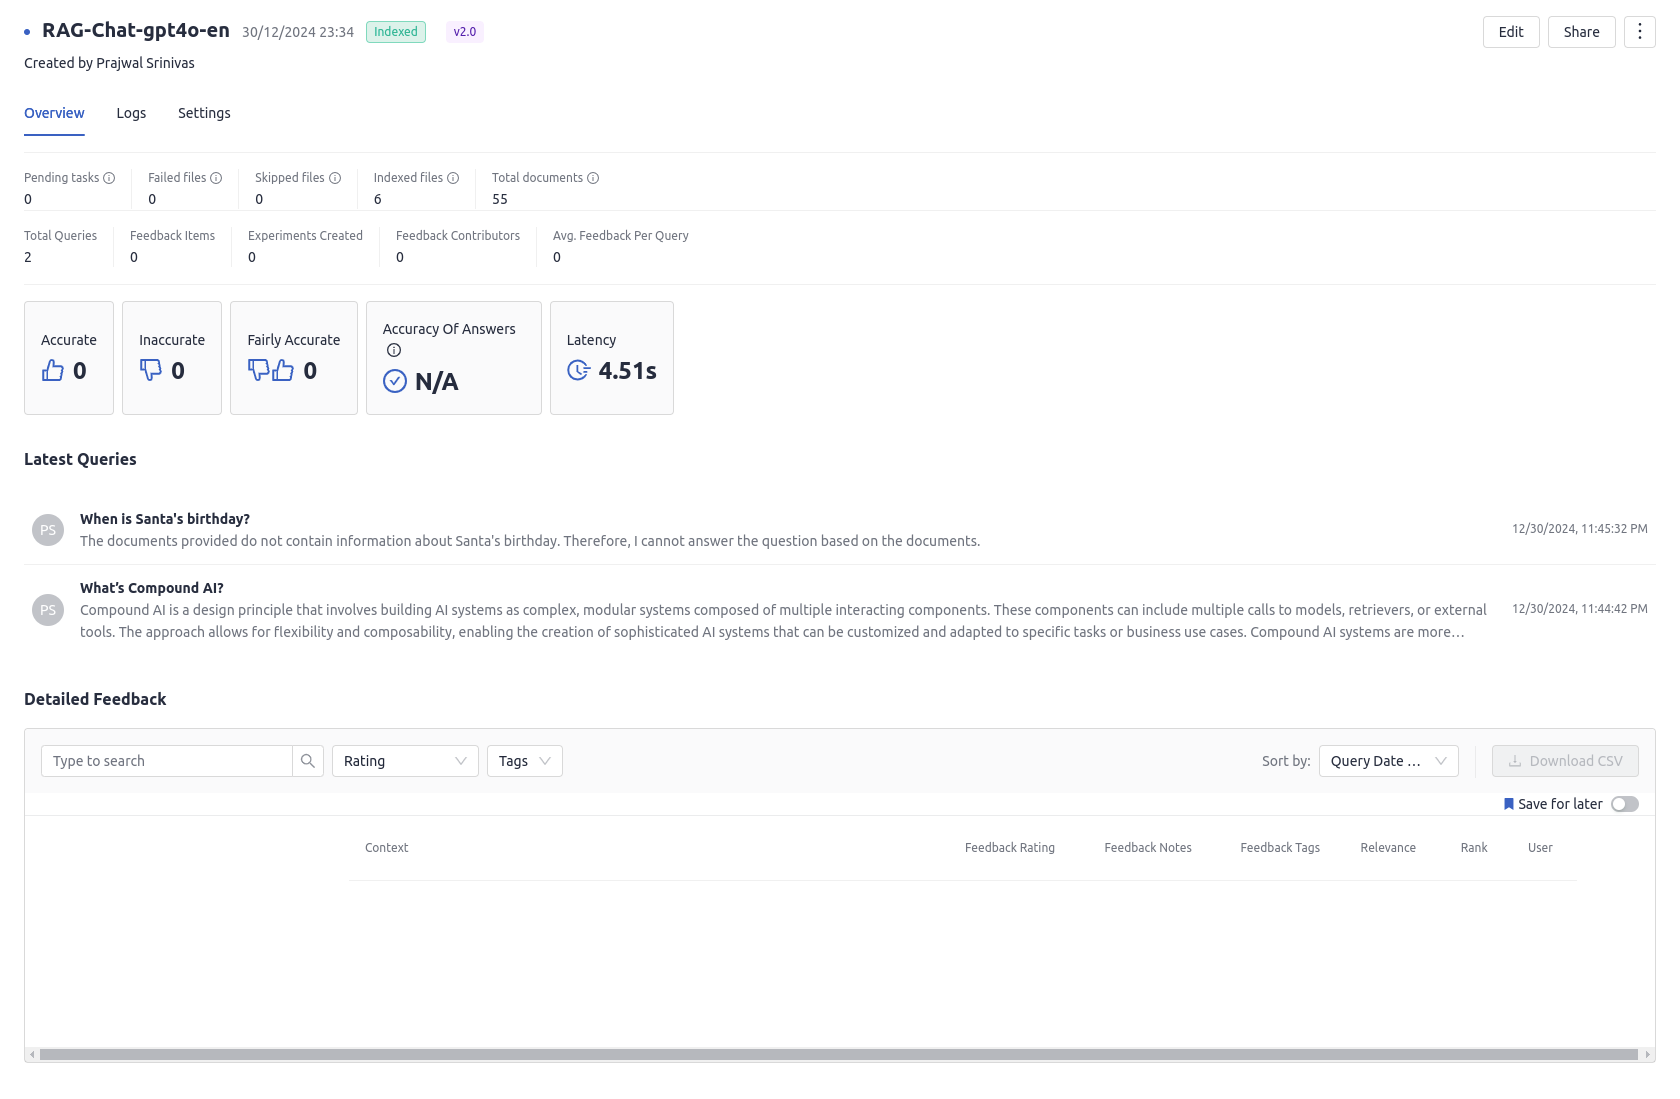

## Playground

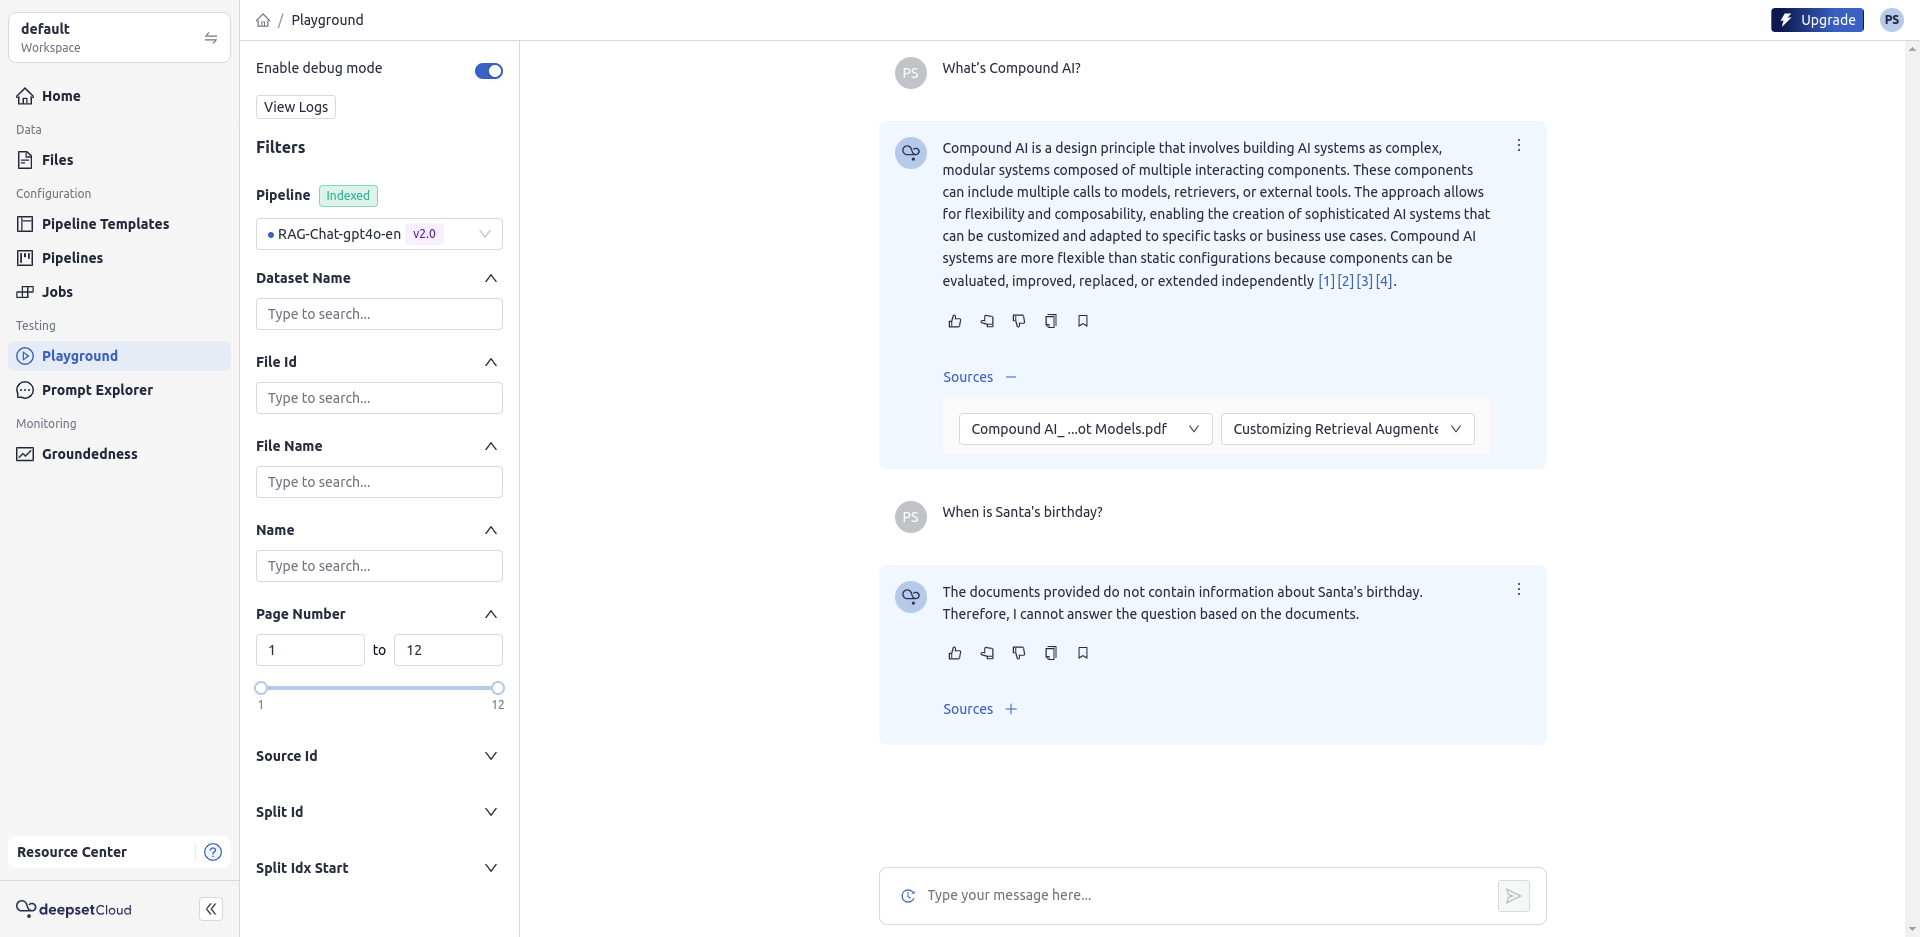

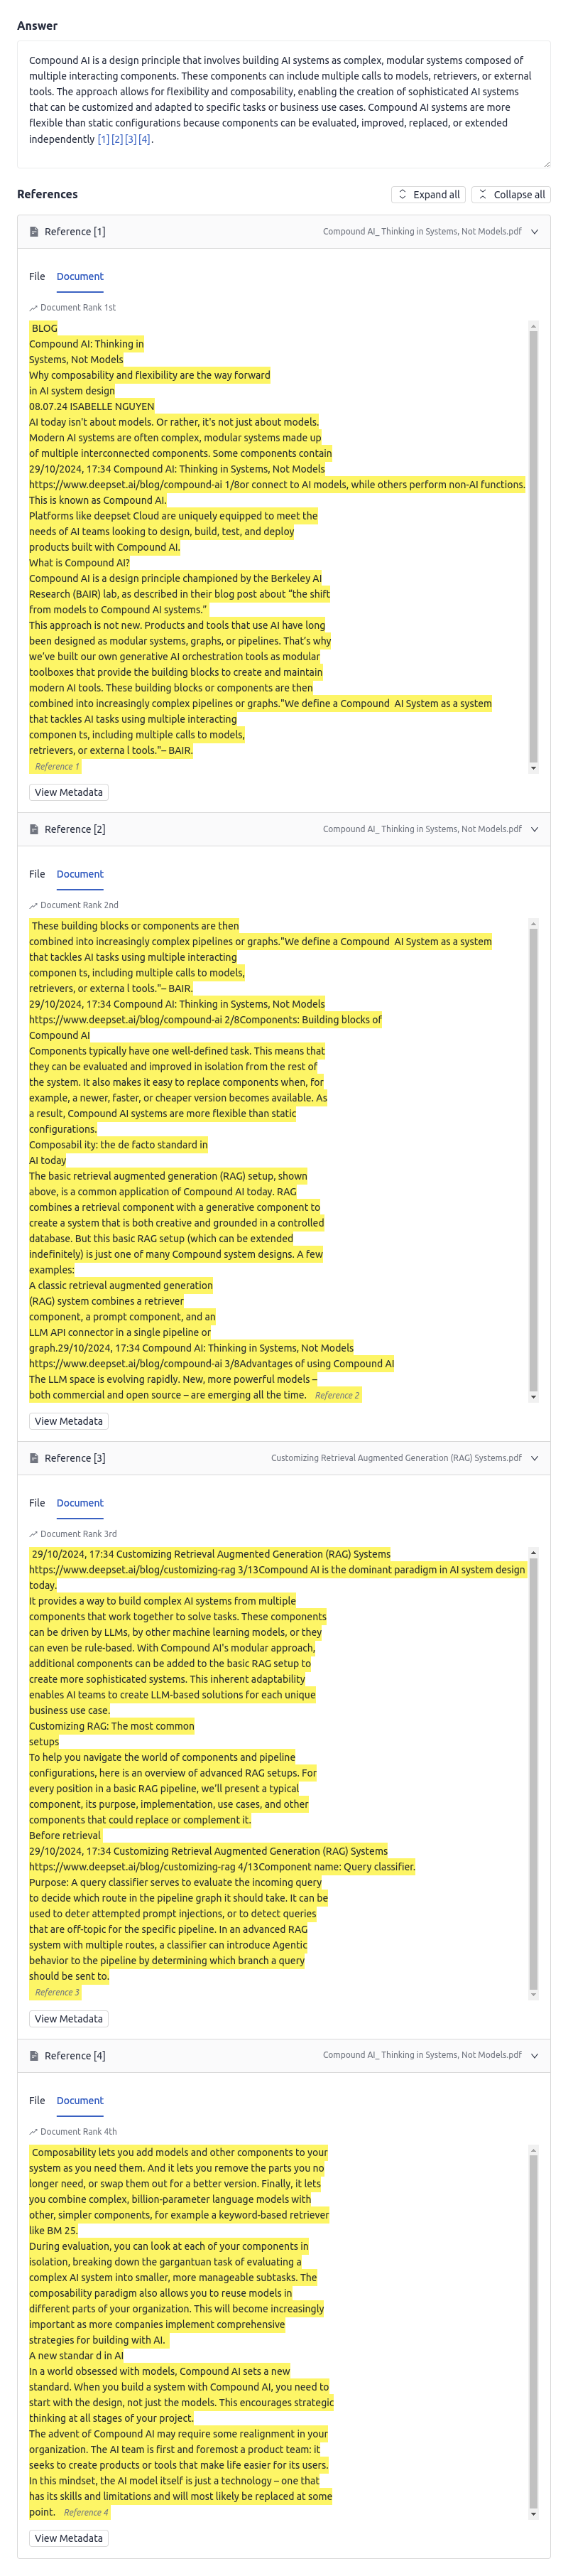